In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Using df.head() doesn't display all the columns because of the size of the DF
# by using transpose, we make the columns the rows.
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# lets clean up the data
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
categorical_columns = list(df.dtypes[df.dtypes  == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
# Now we go through and clean up the data in the columns
for c in categorical_columns: 
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
# setting error value to coerce will just return the input value as the output
tc = pd.to_numeric(df.totalcharges, errors='coerce')
# show the rows in DF that match tc.isnull and just show the two columns we want to see
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

In [11]:
# convert the yes no values into 1 and 0
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

Set up the validaiton framework using Scikit-Learn

In [12]:
from sklearn.model_selection import train_test_split
df_full_train, df_test  = train_test_split(df, test_size=0.2, random_state=1)
len(df)

7043

In [13]:
len(df_full_train), len(df_test)

(5634, 1409)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [15]:
# get y_values
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,1
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0


In [16]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [17]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [18]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

EDA - Exploratory Data Analysiz

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.churn.value_counts(normalize=True)
# normalize will give us the %, so we can see that the churn rate is 26.9%

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [21]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [23]:

df.columns
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature Importance

Churn Rate

In [25]:
df_full_train[df_full_train.gender == 'male'].churn.mean()

0.2632135306553911

In [26]:
df_full_train[df_full_train.gender =='female'].churn.mean()

0.27682403433476394

In [27]:
df_full_train.churn.mean()

0.26996805111821087

In [28]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

In [29]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner, churn_no_partner

(0.20503330866025166, 0.3298090040927694)

In [30]:
# Now we begin to see that Gender does not matter so much in churn rate but for Partner, is matters and is important


Risk Ratio

In [31]:
churn_no_partner / global_churn_rate

1.2216593879412643

In [32]:
churn_partner / global_churn_rate

0.7594724924338315

Doing this in SQL

SELECT 
    gender,
    AVG(churn),
    AVG(churn) - global_churn as diff,
    AVG(churn) / global_churn as risk
FROM
    data
GROUP BY 
    gender;

In [33]:
# Lets do that query in Pandas
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [34]:
df_partner_group = df_full_train.groupby('partner').churn.agg(['mean', 'count'])
df_partner_group['diff'] = df_partner_group['mean'] - global_churn_rate
df_partner_group['risk'] = df_partner_group['mean'] / global_churn_rate
df_partner_group

,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


In [35]:
from IPython.display import display    

In [36]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Feature Importance: Mutual Information

In [37]:
from sklearn.metrics import mutual_info_score

In [38]:
for c in categorical:
    print(c)
    score = mutual_info_score(df_full_train[c], df_full_train['churn'])
    display(score)
    print()

gender


0.0001174846211139946


seniorcitizen


0.009410216144208144


partner


0.009967689095399745


dependents


0.012345815445534689


phoneservice


0.00022871269738296285


multiplelines


0.0008574478744731856


internetservice


0.055867945893496467


onlinesecurity


0.06308524972985574


onlinebackup


0.0469234640537918


deviceprotection


0.04345286925268559


techsupport


0.06103245991777444


streamingtv


0.03185333110086085


streamingmovies


0.03158089669519908


contract


0.0983203874041556


paperlessbilling


0.01758882715925275


paymentmethod


0.043210027531582915

In [39]:
# We can also define this as a function and apply it to out data frame using df.frame()
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)



In [40]:
# df[x].apply(y) = apply a function Y to the X series of the DF 
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False).to_frame(name='MI Score')

,MI Score
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


Feature Importance
Correlation - Numerical Columns

In [41]:
df_full_train[numerical].columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [42]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [43]:
# check churn for tenure
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [44]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure  <= 12)].churn.mean()

0.3994413407821229

In [45]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [46]:
df_full_train[df_full_train.monthlycharges < 20].churn.mean()

0.08829568788501027

In [47]:
df_full_train[df_full_train.monthlycharges > 20].churn.mean()

0.28859323028761497

One Hot Encoding

In [48]:
# Done with Scikit-learn instead of manually
from sklearn.feature_extraction import DictVectorizer

In [49]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:20].to_dict(orient="records")

In [50]:
train_dicts = df_train[categorical + numerical].to_dict(orient="records")

In [51]:
dv = DictVectorizer(sparse=False)

In [52]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [53]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.]])

In [54]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [55]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [56]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [57]:
X_train =  dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [58]:
val_dicts = df_val[categorical + numerical].to_dict(orient="records")

In [59]:
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

Logistic Regression vs Linear Regression

In [60]:
# sigmoid function
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [61]:
z = np.linspace( -5, 5, 51)

In [62]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

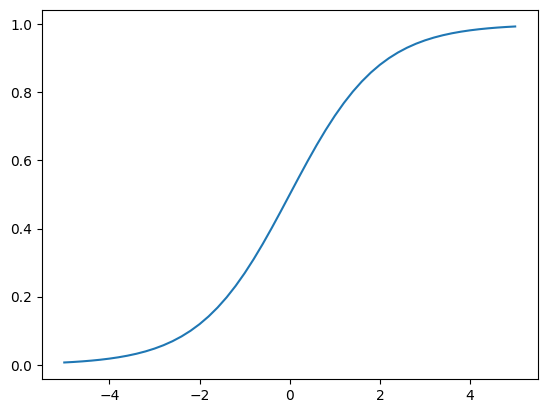

In [63]:
plt.plot(z, sigmoid(z))

In [64]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [65]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
#         both use Dot product, so they are considered Linear Models. Fast to train.
        
    result = sigmoid(score)
    return result

Training Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# The weights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [69]:
model.intercept_[0]

-0.10906983612861662

In [70]:
model.predict(X_train)
# This will pump out Hard Predictions - they are labeled. They are not the probabilities

array([0, 1, 1, ..., 1, 0, 1])

In [71]:
model.predict_proba(X_train)
# This are soft predictions - giving us the probabilities of churn
# It gives us [probability of not chruning - 0, probability of churning - 1]

array([[0.90443048, 0.09556952],
       [0.32074291, 0.67925709],
       [0.36639176, 0.63360824],
       ...,
       [0.4684025 , 0.5315975 ],
       [0.95750228, 0.04249772],
       [0.30138089, 0.69861911]])

In [72]:
y_pred = model.predict_proba(X_val)[:, 1]

In [73]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [74]:
df_val[churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

In [75]:
# testing accuracy
y_val
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [76]:
(y_val == churn_decision).mean()

0.8034066713981547

In [77]:
# make a DF
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.008998,0,0
1,0.204370,0,0
2,0.212051,0,0
3,0.543001,1,1
4,0.213627,0,0
...,...,...,...
1404,0.313505,0,0
1405,0.039354,0,1
1406,0.136380,0,0
1407,0.799702,1,1


In [78]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008998,0,0,True
1,0.204370,0,0,True
2,0.212051,0,0,True
3,0.543001,1,1,True
4,0.213627,0,0,True
...,...,...,...,...
1404,0.313505,0,0,True
1405,0.039354,0,1,False
1406,0.136380,0,0,True
1407,0.799702,1,1,True


In [79]:
df_pred.correct.mean()

0.8034066713981547

Model Interpretation

In [80]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [81]:
small = ['contract', 'tenure', 'monthlycharges']
df_small_train = df_train[small].to_dict(orient="records")
df_small_val = df_val[small].to_dict(orient="records")

In [82]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit_transform(df_small_train)

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]])

In [83]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [84]:
X_train_small = dv_small.fit_transform(df_small_train)

In [85]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [86]:
w0 = model_small.intercept_[0]
w0

-2.476775662198788

In [87]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [88]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [89]:
# fake customer - contract, monthly charges, tenure
-2.47 + 0.97 + 80 * 0.027 + 1 * -.036


0.6239999999999999

In [90]:
sigmoid(0.6239999999999999)

0.6511277386034051

Using the model

In [91]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")


In [92]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [93]:
y_full_train = df_full_train.churn.values

In [94]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [95]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")


In [96]:
X_test = dv.transform(dicts_test)

In [97]:
y_pred = model.predict_proba(X_val)[:, 1]

In [98]:
churn_decision = (y_pred >= 0.5)

In [99]:
(churn_decision == y_test).mean()

0.6486870120652946

In [100]:
customer = dicts_test[-1]

In [101]:
X_small = dv.transform([customer])

In [102]:
model.predict_proba(X_small)[0, 1]

0.5968852088271023

# 4.2 Accuracy and dummy model

In [103]:
len(y_val)

1409

In [104]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [105]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)
    print('%.2f %.3f' % (t, score))



0.00 0.274
0.05 0.495
0.10 0.590
0.15 0.664
0.20 0.720
0.25 0.754
0.30 0.774
0.35 0.779
0.40 0.785
0.45 0.796
0.50 0.802
0.55 0.815
0.60 0.803
0.65 0.790
0.70 0.778
0.75 0.759
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


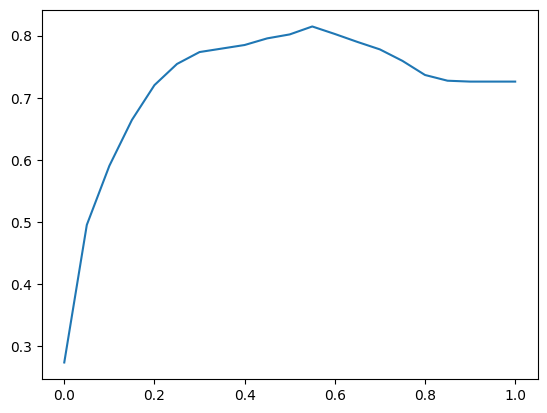

In [106]:
plt.plot(thresholds, scores)

In [107]:
from collections import Counter

In [108]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [109]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [110]:
t = 0.5

In [111]:

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [112]:
tp =(predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp, tn

(210, 920)

In [113]:

fp =(predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp, fn

(103, 176)

In [114]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[920, 103],
       [176, 210]])

In [115]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [116]:
# Precision
p = tp / (tp + fp)
p

0.670926517571885

In [117]:
# Recall
R = tp / (tp + fn)
R

0.5440414507772021

In [118]:
tpr = tp /(tp+fn)
tpr, R

(0.5440414507772021, 0.5440414507772021)

In [119]:
fpr = fp/ (tn + fp)
fpr

0.10068426197458455

In [120]:
thresholds = np.linspace(0 , 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [121]:
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp =(predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp =(predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, tn, fn))
columns = ['thresholds', 'tp', 'fp', 'tn', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)
# [::10] says to look at every 10th record for all records

In [122]:
df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
df_scores[::10]

,thresholds,tp,fp,tn,fn,fpr,tpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,365,556,467,21,0.543500,0.945596
20,0.2,330,338,685,56,0.330401,0.854922
30,0.3,293,226,797,93,0.220919,0.759067
40,0.4,249,166,857,137,0.162268,0.645078
50,0.5,210,103,920,176,0.100684,0.544041
60,0.6,158,50,973,228,0.048876,0.409326
70,0.7,93,20,1003,293,0.019550,0.240933
80,0.8,17,2,1021,369,0.001955,0.044041
90,0.9,0,0,1023,386,0.000000,0.000000


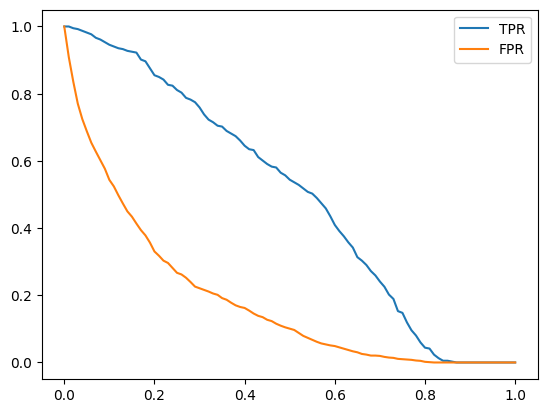

In [123]:
plt.plot(df_scores.thresholds, df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds, df_scores['fpr'], label="FPR")

plt.legend()

In [124]:
# random model
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [125]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [126]:
def tpr_dpr_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp =(predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp =(predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, tn, fn))
        
    columns = ['thresholds', 'tp', 'fp', 'tn', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
    df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)

    return df_scores
    

In [127]:
df_rand = tpr_dpr_dataframe(y_val, y_rand)

In [128]:
df_rand[::10]

,thresholds,tp,fp,tn,fn,fpr,tpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,100,39,0.902248,0.898964
20,0.2,307,822,201,79,0.803519,0.795337
30,0.3,276,724,299,110,0.707722,0.715026
40,0.4,237,624,399,149,0.609971,0.613990
50,0.5,202,518,505,184,0.506354,0.523316
60,0.6,161,409,614,225,0.399804,0.417098
70,0.7,121,302,721,265,0.295210,0.313472
80,0.8,78,206,817,308,0.201369,0.202073
90,0.9,40,101,922,346,0.098729,0.103627


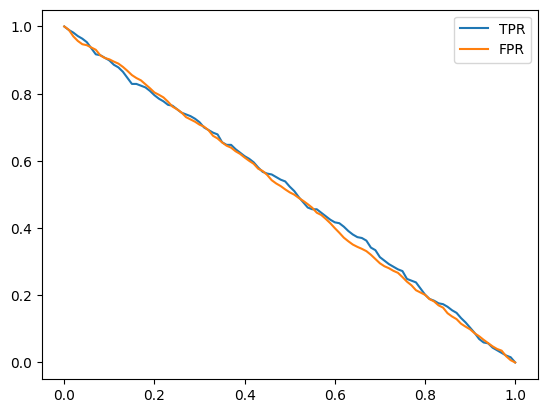

In [129]:
plt.plot(df_rand.thresholds, df_rand['tpr'], label='TPR')
plt.plot(df_rand.thresholds, df_rand['fpr'], label="FPR")

plt.legend()

In [130]:
# Ideal Model
